<a href="https://colab.research.google.com/github/Shakil161203/AI-Lab/blob/main/Sepsis_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset

**The dataset consists of 110,204 admissions of 84,811 hospitalized subjects between 2011 and 2012 in Norway who were diagnosed with infections, systemic inflammatory response syndrome, sepsis by causative microbes, or septic shock. The prediction task is to determine whether a patient survived or is deceased at a time of about 9 days after collecting their medical record at the hospital.**

**About columns in dataset**

1.age_years : Age of patients in Years

2.sex_0male_1female : Gender of pateints encoded as { 0:male , 1:Female }

3.episode_number : Number of prior sepsis episodes

4.hospital_outcome_1alive_0dead : Status of Pateints after 9351 days of being admitted to hospital encoded as { 0:Dead, 1:Alive }

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.metrics import accuracy_score

In [3]:
#importing dataset/kaggle/input/sepsis-survival-minimal-clinical-records/s41598-020-73558-3_sepsis_survival_dataset/s41598-020-73558-3_sepsis_survival_primary_cohort
df1=pd.read_csv("/content/Sepsis Survival Prediction.csv")
df2=pd.read_csv("/content/Sepsis Survival Prediction (2).csv")
df3=pd.read_csv("/content/Sepsis Survival Prediction (3).csv")

In [4]:
#joining all dataset into a single df
df=pd.concat([df1,df2,df3],axis=0,ignore_index=True)

In [5]:
#first few rows of df
df.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [6]:
#last few rows of df
df.tail()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
129387,47,0,1,1
129388,50,0,1,0
129389,62,0,1,1
129390,58,0,1,0
129391,55,1,1,1


In [7]:
#no of rows and columns in df
df.shape

(129392, 4)

In [8]:
#name & datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129392 entries, 0 to 129391
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      129392 non-null  int64
 1   sex_0male_1female              129392 non-null  int64
 2   episode_number                 129392 non-null  int64
 3   hospital_outcome_1alive_0dead  129392 non-null  int64
dtypes: int64(4)
memory usage: 3.9 MB


In [9]:
#perform basic statistical operations in numeric columns
df.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,129392.000000,129392.000000,129392.000000,129392.000000
mean,64.170057,0.470075,1.356081,0.909307
std,23.644353,0.499106,0.756492,0.287174
min,0.000000,0.000000,1.000000,0.000000
25%,53.000000,0.000000,1.000000,1.000000
50%,70.000000,0.000000,1.000000,1.000000
75%,82.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


In [10]:
#check missing values
df.isnull().sum()

,0
age_years,0
sex_0male_1female,0
episode_number,0
hospital_outcome_1alive_0dead,0


In [11]:
#renaming the name of columns
new_columns={
    'age_years':'Age',"sex_0male_1female":'Sex','episode_number':'Episode Number'
    ,'hospital_outcome_1alive_0dead':'Hospital Outcome'
}
df=df.rename(columns=new_columns)

In [12]:
df.head()

,Age,Sex,Episode Number,Hospital Outcome
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


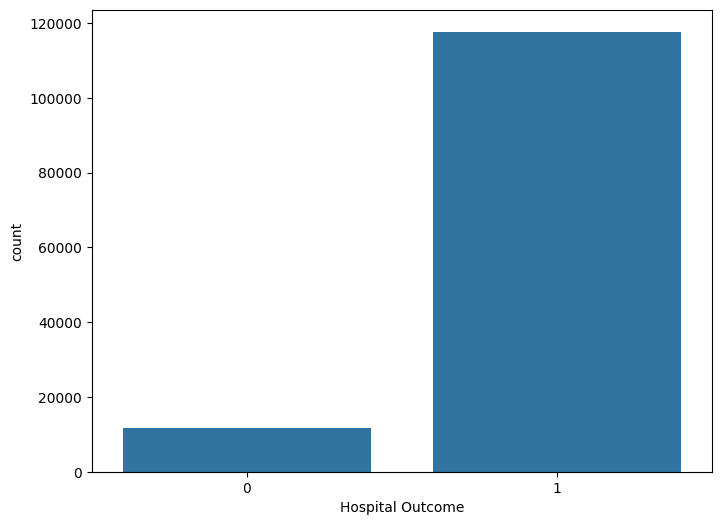

In [13]:
#countplot of Hospital Outcome column
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Hospital Outcome')
plt.show()

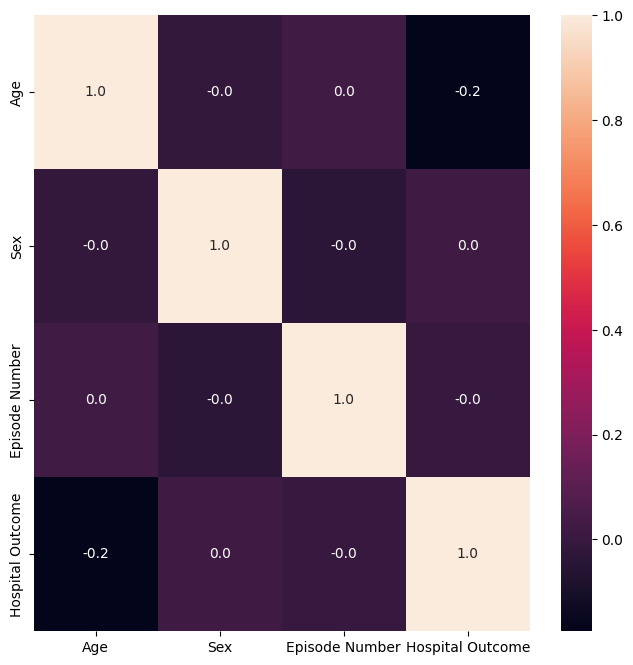

In [14]:
#heatmap of correlation between all columns
cor=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cor, annot=True, fmt=".1f")
plt.show()

In [15]:
# seperate the feature variables & target variable
X=df.drop(columns='Hospital Outcome')
Y=df['Hospital Outcome']

In [16]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

**Standardization**

In [17]:
SS=StandardScaler()

In [18]:
X_train_transformed=SS.fit_transform(X_train)

In [19]:
X_test_transformed=SS.transform(X_test)

**Logistic Regression**

In [20]:
LR=LogisticRegression()

In [21]:
LR.fit(X_train_transformed,Y_train)

LogisticRegression()

In [22]:
Y_pred=LR.predict(X_test_transformed)

In [23]:
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9102262891059726


**KNN**

In [24]:
accurac1y=[]

In [25]:
for i in range(3,16):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train_transformed,Y_train)
    Y_pred2=KNN.predict(X_test_transformed)
    accurac1y.append(accuracy_score(Y_test, Y_pred2))

In [26]:
print('Accuracy max :',max(accurac1y))

Accuracy max : 0.9102572029182638


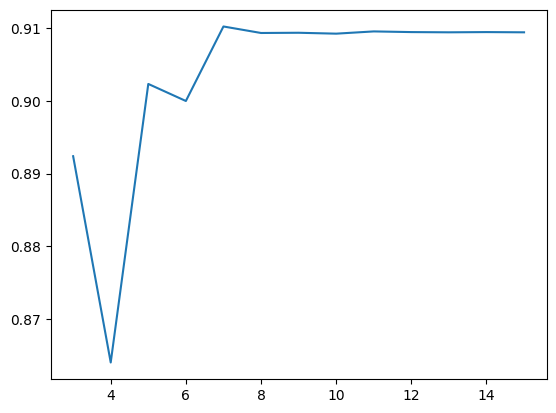

In [27]:
plt.plot(range(3,16),accurac1y)

Here we can see from the graph that accuracy score is maximum at k=9



**Decision Tree Classifier**

In [28]:
accurac=[]

In [29]:
for i in range(2,16):
    DTC=DecisionTreeClassifier(max_depth=i)
    DTC.fit(X_train_transformed,Y_train)
    Y_pred2=DTC.predict(X_test_transformed)
    accurac.append(accuracy_score(Y_test, Y_pred2))

In [30]:
print('Accuracy max :',max(accurac))

Accuracy max : 0.9102572029182638


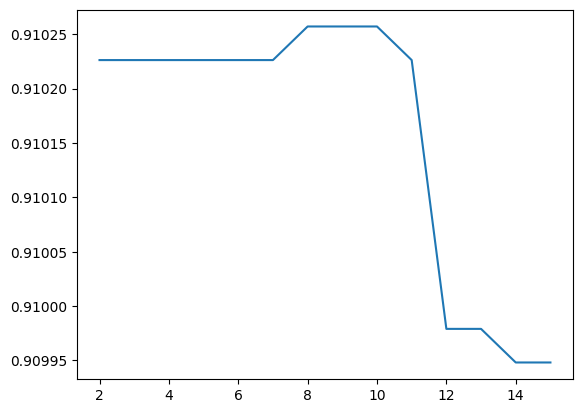

In [31]:
plt.plot(range(2,16),accurac)

Here we can see from the graph that accuracy score is maximum at max_depth=3. lets keep the value of max_depth =9 and create another Decision Tree Classifier and visualize it

In [32]:
DTC1=DecisionTreeClassifier(max_depth=3)
DTC1.fit(X_train_transformed,Y_train)
y_pred21=DTC.predict(X_test_transformed)

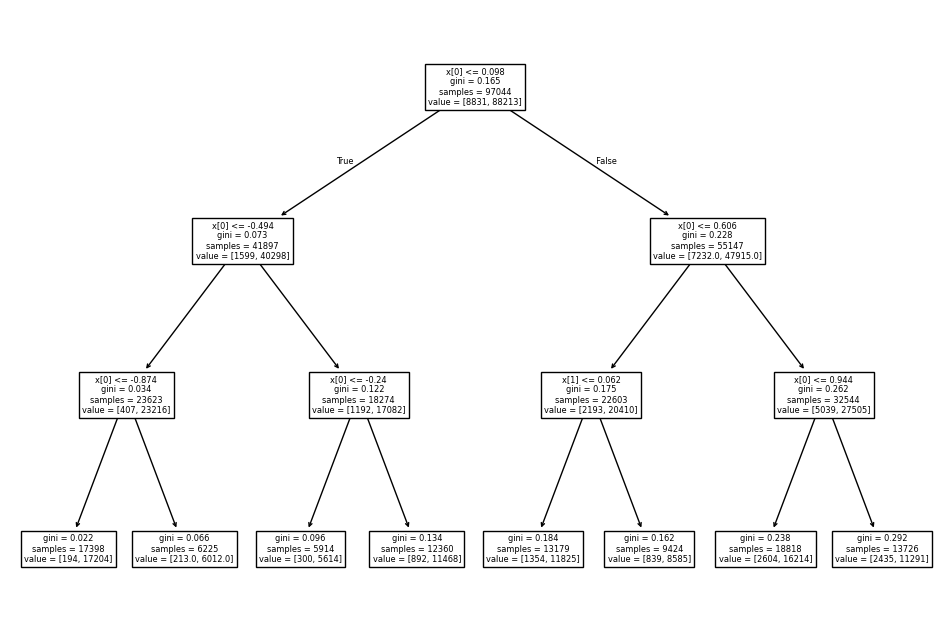

In [33]:
#visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(DTC1)
plt.show()

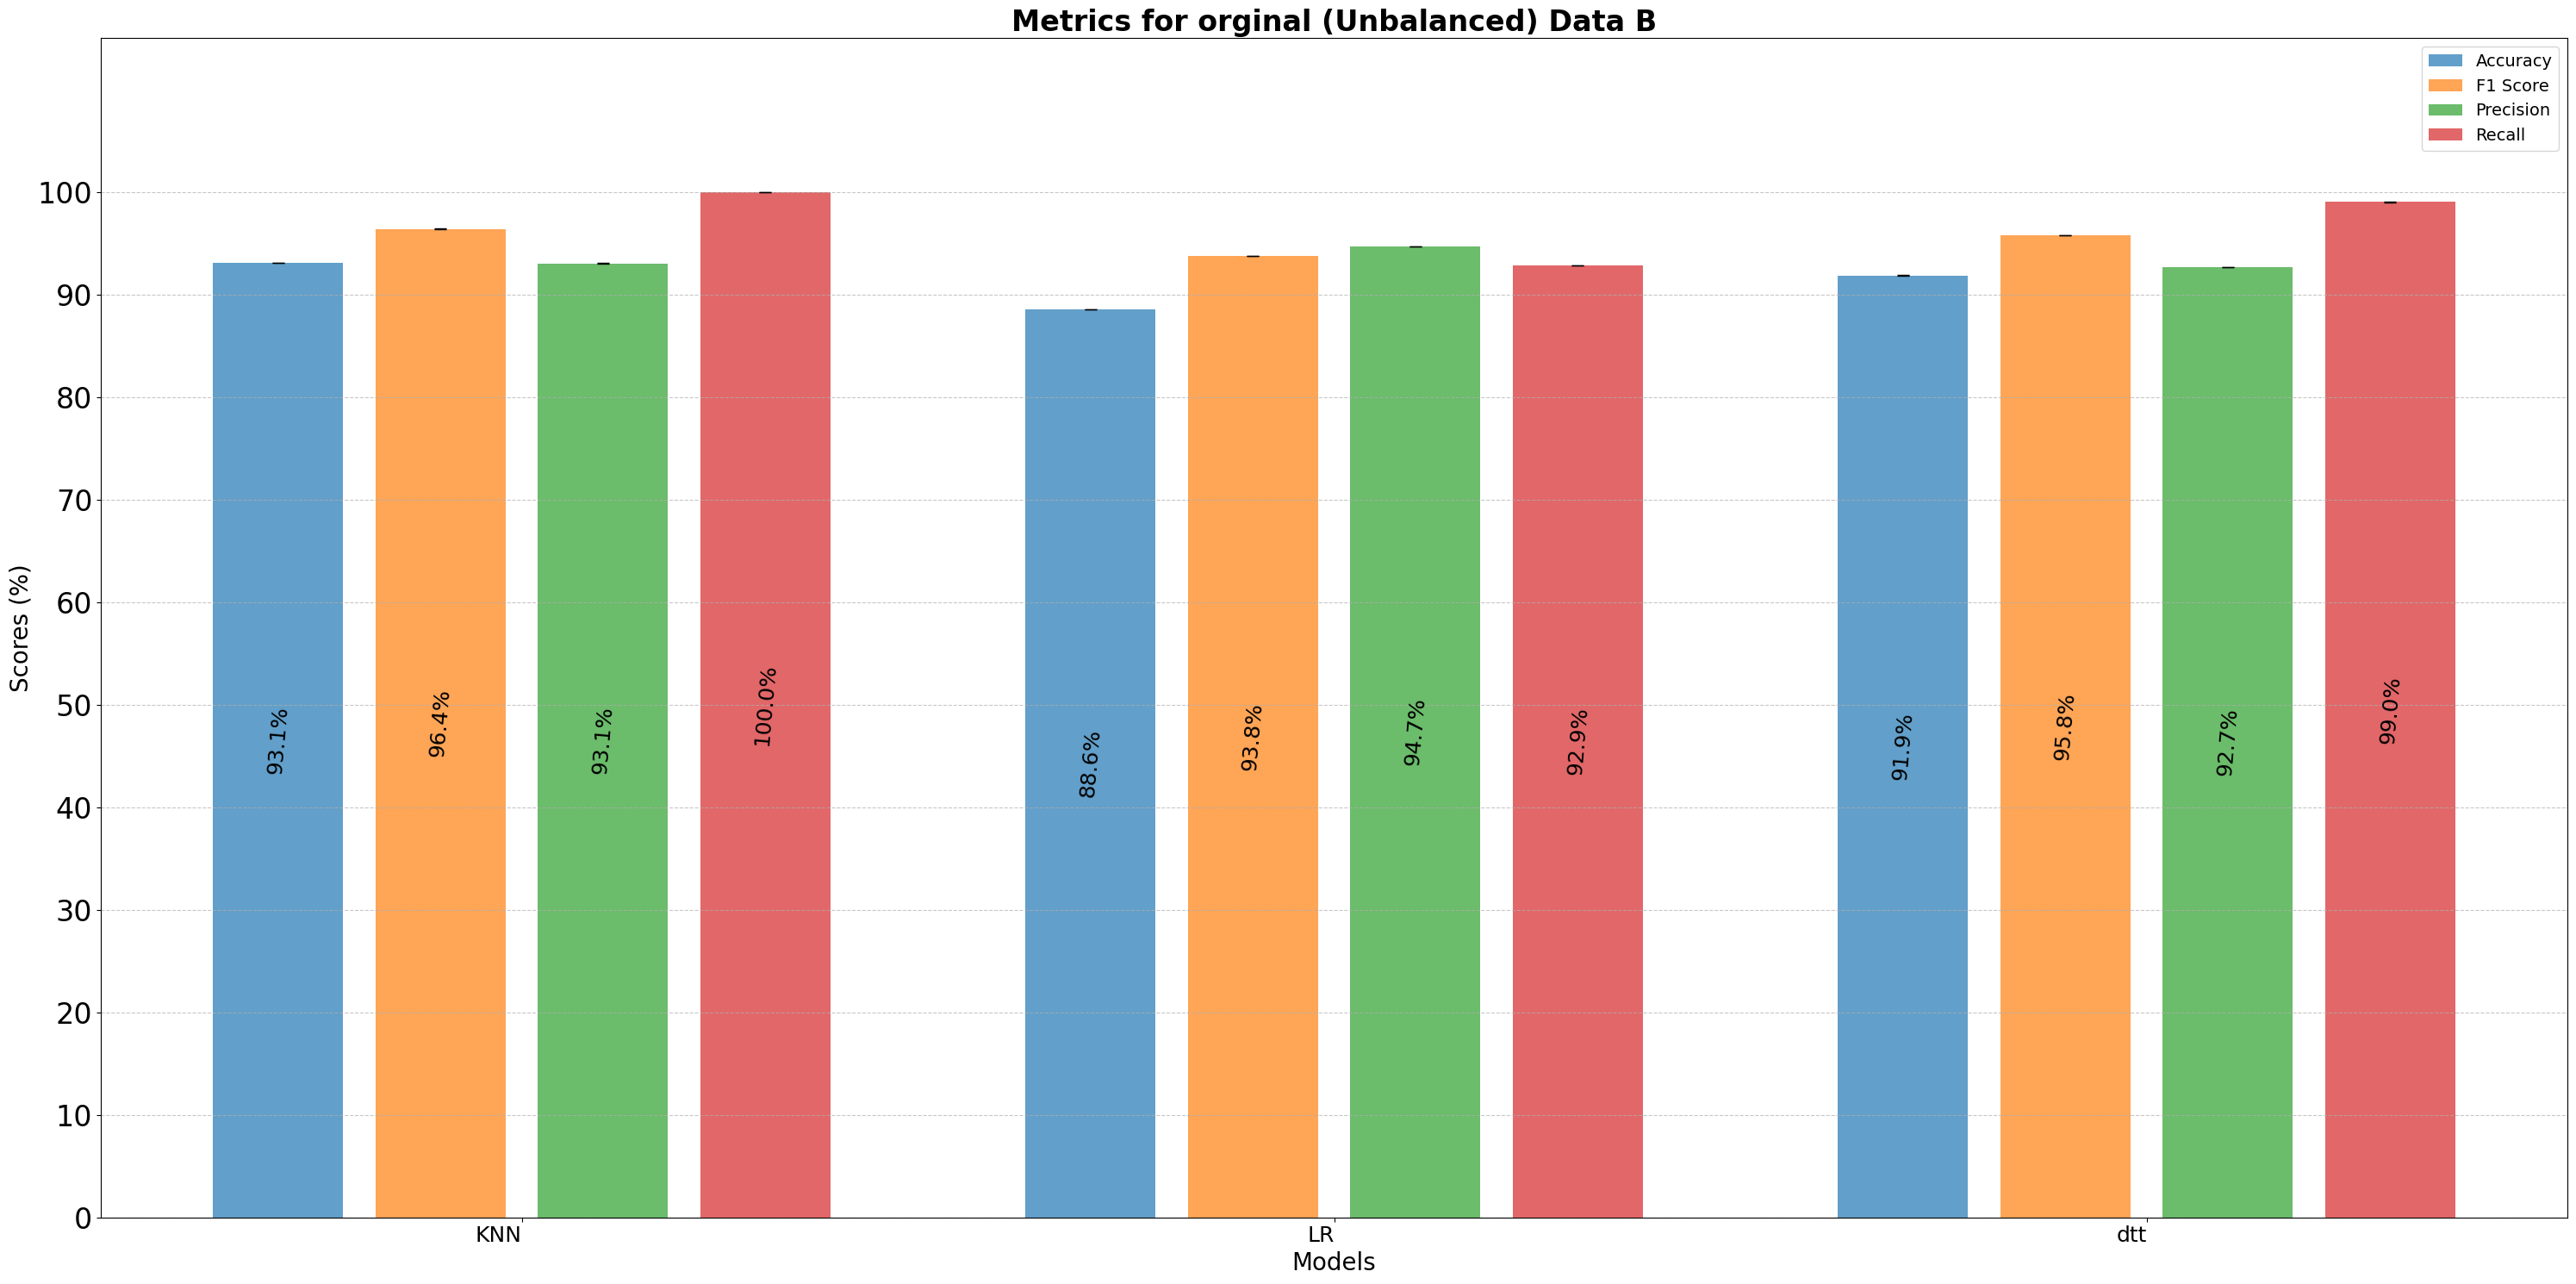

In [34]:
# Model names and their corresponding metrics
models = ['KNN', 'LR', 'dtt']

# Accuracy, Precision, Recall, F1 Score for each model (updated based on the provided data)
accuracy = [100 * x for x in [
    0.9307228915662651, 0.8855421686746988, 0.9186746987951807,
]]
precision = [100 * x for x in [
    0.9305135951661632, 0.9470198675496688, 0.9270516717325228
]]
recall = [100 * x for x in [
    1.0, 0.9285714285714286, 0.9902597402597403,
]]
f1_score = [100 * x for x in [
    0.9640062597809077, 0.9377049180327869, 0.957613814756672
]]

# Dummy error values for error bars (calculated or assumed for the sake of this example)
error_accuracies = [0.02, 0.03, 0.02]
error_precisions = [0.01, 0.02, 0.01]
error_recalls = [0.01, 0.01, 0.02,]
error_f1_scores = [0.02, 0.03, 0.02]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For `0.0%` values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=5,  # No rotation for 0.0%
                rotation_mode='anchor'
            )

        else:
            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=85,  # Rotate the non-zero text
                rotation_mode='anchor'
            )
x_pos_adjusted = x_pos.copy()
x_pos_adjusted[-1] += 0.2

# Styling and layout
ax.set_title('Metrics for orginal (Unbalanced) Data B', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Scores (%)', fontsize=20)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right', fontsize=18)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for orginal (Unbalanced) Data B.pdf', bbox_inches='tight')
plt.show()